<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Prueba Examen Marta Simón
<a class="tocSkip">    
</h1> 

## Carga de las librerías estándar de Data Science con Python 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

sns.set()

# Preguntas del examen
## Apartado 1
+ Lee el fichero de datos y crea un data.frame de R llamado `aireMadrid`, que usaremos para el resto del examen.


In [2]:
# Leemos el fichero de datos
aireMadrid = pd.read_csv("data/Prueba Examen/aireMadrid.csv")
aireMadrid.head()
#aireMadrid.estacion.value_counts()

,estacion,magnitud,mes,dia,medicion,lluvia_mm
0,4,1,1,1,18.0,0.0
1,4,1,1,2,20.0,0.0
2,4,1,1,3,18.0,0.0
3,4,1,1,4,19.0,0.0
4,4,1,1,5,18.0,0.0


+ **C1: ¿Cuántas observaciones hay en la tabla? ¿Cuántas variables?**

In [3]:
print(f"El numero de observaciones que hay en la tabla es de (filas, columnas): {aireMadrid.shape}")

El numero de observaciones que hay en la tabla es de (filas, columnas): (26691, 6)


In [4]:
print(f"Las columnas(variables) que componen la tabla son: {aireMadrid.columns}")

Las columnas(variables) que componen la tabla son: Index(['estacion', 'magnitud', 'mes', 'dia', 'medicion', 'lluvia_mm'], dtype='object')


In [5]:
# En este no tiene sentido pero para otros puede ser util
print("Podemos ver la información más relevante de las variables numéricas en la siguiente tabla:")
aireMadrid.describe()

Podemos ver la información más relevante de las variables numéricas en la siguiente tabla:


,estacion,magnitud,mes,dia,medicion,lluvia_mm
count,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000
mean,34.221835,12.317073,6.360046,16.000000,27.361235,1.022892
std,17.811924,9.675781,3.699645,8.944439,37.839935,4.250479
min,4.000000,1.000000,1.000000,1.000000,0.010000,0.000000
25%,18.000000,7.000000,3.000000,8.000000,3.000000,0.000000
50%,36.000000,9.000000,7.000000,16.000000,14.000000,0.000000
75%,50.000000,12.000000,10.000000,24.000000,38.000000,0.000000
max,60.000000,44.000000,12.000000,31.000000,501.000000,38.400000


+ **C2: ¿Hay datos ausentes? ¿De qué tipo son las variables? Para empezar a entender la estructura de los
datos haz alguna exploración preliminar de los datos. En particular, haz una tabla de magnitud frente
a estacion (la tabla es grande). Verás que no disponemos de mediciones de todas las magnitudes para
todas las estaciones.**

In [6]:
print("El tipo de las variables lo podemos ver en la siguiente tabla:")
aireMadrid.info()

El tipo de las variables lo podemos ver en la siguiente tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26691 entries, 0 to 26690
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estacion   26691 non-null  int64  
 1   magnitud   26691 non-null  int64  
 2   mes        26691 non-null  int64  
 3   dia        26691 non-null  int64  
 4   medicion   26691 non-null  float64
 5   lluvia_mm  26691 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.2 MB


In [7]:
# Para comprobar si hay datos ausentes, hacemos lo siguiente
# Localizamos los datos ausentes
Nan = aireMadrid.isnull().values.any()
print(f"¿Hay datos ausentes?: {Nan}")

¿Hay datos ausentes?: False


In [8]:
CT = pd.crosstab(aireMadrid['magnitud'], aireMadrid['estacion'])
CT
# En la tabla, las celas que indican 0 son mediciones que no tenemos 

estacion,4,8,11,16,17,18,24,27,35,36,...,48,49,50,54,55,56,57,58,59,60
magnitud,,,,,,,,,,,,,,,,,,,,,
1,217,155,0,0,186,155,217,0,124,155,...,0,0,0,0,0,0,93,0,0,0
6,217,155,0,217,0,155,217,0,186,186,...,0,0,0,0,0,155,155,0,0,0
7,217,155,217,217,186,155,217,217,186,186,...,217,217,217,217,186,155,124,217,155,217
8,217,155,217,217,186,155,217,217,186,186,...,217,217,217,217,186,155,124,217,155,217
9,0,155,0,0,0,0,186,0,0,0,...,186,0,186,0,0,155,0,0,0,0
10,0,155,0,0,0,93,186,0,0,93,...,186,0,186,0,155,155,93,0,0,186
12,217,155,217,217,186,155,217,217,186,186,...,217,217,217,217,186,155,124,217,155,217
14,0,155,0,217,155,124,217,186,186,0,...,0,217,0,217,0,155,0,155,155,155
20,0,124,186,0,0,186,155,0,0,0,...,0,0,0,0,62,0,0,0,0,0


+ **C3: Piensa en la estructura de la tabla y la forma en la que se codifica la información. Para guiarte en
este apartado, analiza por ejemplo si las mediciones de Dióxido de azufre (magnitud 1) siguen una
distribución normal (haz un análisis gráfico, incluyendo los datos de ozono de todas las estaciones).
Los datos de la tabla ¿son datos limpios (tidy)? Atención: no se pide que los transformes en datos
limpios, sino que digas si lo son.**

In [9]:
#Vamos a realizar la gráfica de la variable Magnitud para dioxido de azufre, pintando su curva de densidad para ver su distribucion
medición_dioxido = aireMadrid[(aireMadrid.magnitud == 1)]
medición_dioxido

,estacion,magnitud,mes,dia,medicion,lluvia_mm
0,4,1,1,1,18.0,0.0
1,4,1,1,2,20.0,0.0
2,4,1,1,3,18.0,0.0
3,4,1,1,4,19.0,0.0
4,4,1,1,5,18.0,0.0
...,...,...,...,...,...,...
23648,57,1,7,27,5.0,0.0
23649,57,1,7,28,5.0,0.0
23650,57,1,7,29,5.0,0.0
23651,57,1,7,30,5.0,0.0


In [10]:
# vamos a dividir la tabla por estaciones(bins)
bins = np.arange(aireMadrid.estacion.min(), aireMadrid.estacion.max(), 1) # Con esto, generamos un array de numeros ordenados del -4 al 4, con saltos de 1 en 1 (rango en el que se mueve la variable c, que podriamos averiguar sacando el min y max)

print(bins)

medicion_binned = pd.cut(medición_dioxido.medicion, bins=bins+1, ordered=True)
aireMadrid["medicion_binned"] = medicion_binned
aireMadrid

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59]


,estacion,magnitud,mes,dia,medicion,lluvia_mm,medicion_binned
0,4,1,1,1,18.0,0.0,"(17.0, 18.0]"
1,4,1,1,2,20.0,0.0,"(19.0, 20.0]"
2,4,1,1,3,18.0,0.0,"(17.0, 18.0]"
3,4,1,1,4,19.0,0.0,"(18.0, 19.0]"
4,4,1,1,5,18.0,0.0,"(17.0, 18.0]"
...,...,...,...,...,...,...,...
26686,60,14,10,27,28.0,0.0,NaN
26687,60,14,10,28,33.0,0.0,NaN
26688,60,14,10,29,16.0,0.0,NaN
26689,60,14,10,30,19.0,0.0,NaN


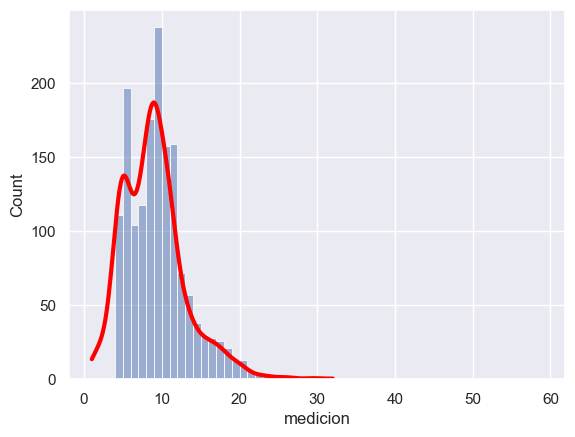

In [11]:
# Se pueden pintar juntos histograma y curva de densidad
# KDE pinta la linea de densidad (sin ello solo pinta el histograma)
# data = Estructura/datos de entrada
# x, y = vectores o claves que especifican los ejes
# stat = density --> para normalizar el eje y, el area total suma 1 (rel_freq)
dens_plot = sns.histplot(data = medición_dioxido, x = 'medicion', kde=True, bins = bins)#, stat='density')
# Editamos el color y grosor de la curva de densidad
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
# Podemos ver que la medicion de los valores de ozono sigue una distribución bimodal, no normal

## Apartado 2
+ **C4: Añade a la tabla un factor lluvia según si ese día llovía o no. Se considera que llovía si el valor
de la variable lluvia_mm es distinto de cero. Haz una tabla de frecuencia relativa de ese factor. ¿Qué
probabilidad están estimando esos valores? (Cuidado, no es la probabilidad de que un día elegido al
azar haya llovido).**

In [12]:
aireMadrid['lluvia'] = np.where(aireMadrid.lluvia_mm > 0 , 1, 0)
aireMadrid

,estacion,magnitud,mes,dia,medicion,lluvia_mm,medicion_binned,lluvia
0,4,1,1,1,18.0,0.0,"(17.0, 18.0]",0
1,4,1,1,2,20.0,0.0,"(19.0, 20.0]",0
2,4,1,1,3,18.0,0.0,"(17.0, 18.0]",0
3,4,1,1,4,19.0,0.0,"(18.0, 19.0]",0
4,4,1,1,5,18.0,0.0,"(17.0, 18.0]",0
...,...,...,...,...,...,...,...,...
26686,60,14,10,27,28.0,0.0,NaN,0
26687,60,14,10,28,33.0,0.0,NaN,0
26688,60,14,10,29,16.0,0.0,NaN,0
26689,60,14,10,30,19.0,0.0,NaN,0


In [13]:
# Hacemos la tabla de frecuencias relativa
aireMadrid.lluvia.value_counts(normalize =True)

0    0.828144
1    0.171856
Name: lluvia, dtype: float64

En la tabla vemos que la probabilidad de lluvia es del 0.17

+ **C5: El dióxido de azufre (magnitud 1) solo se ha medido en algunas estaciones de la red. Calcula el
valor medio de las mediciones de dióxido de azufre en cada una de esas estaciones según si llovía o
no. ¿Qué conclusión extraes?**

In [14]:
 aireMadrid[aireMadrid.magnitud == 1].groupby(['estacion','lluvia']).medicion.mean()

estacion  lluvia
4         0          9.044693
          1          7.973684
8         0          8.793651
          1          6.137931
17        0          8.644737
          1          7.970588
18        0          9.992308
          1          6.800000
24        0          4.720670
          1          4.631579
35        0         12.798077
          1         10.100000
36        0          9.803030
          1          6.782609
38        0         11.269841
          1         10.620690
40        0          9.602649
          1          8.485714
57        0         10.988095
          1         10.222222
Name: medicion, dtype: float64

+ **C6: ¿Cuál es la probabilidad de que una medición de la tabla elegida al azar corresponda a monóxido
de nitrógeno (magnitud 7)? Sabiendo que una medición correspomde a monóxido de Nitrógeno,
¿cuál es la probabilidad de que proceda de la estación 24?
Usa estos valores para calcular la probabilidad de que una medición elegida al azar sea de monóxido
de nitrógeno y se haya hecho en la estación 24. Comprueba el resultado calculando directamente esa
probabilidad.**

In [15]:
# Probabilidad monoxido de nitrogeno
prob_mn = len(aireMadrid[aireMadrid.magnitud == 7])/len(aireMadrid)
print(f"La probabilidad de que una medición de la tabla elegida al azar corresponda a monóxido de nitrógeno es {prob_mn}")

La probabilidad de que una medición de la tabla elegida al azar corresponda a monóxido de nitrógeno es 0.17305458768873402


In [16]:
#(P(estacion=24 | mn)) 0.046980
prob_estacion_mn = aireMadrid[aireMadrid.magnitud == 7].estacion.value_counts(normalize = True)[24]
print(f"P(estacion=24 | medicion = 7) = {prob_estacion_mn} ")

P(estacion=24 | medicion = 7) = 0.04697986577181208 


In [17]:
# P(estacion=24 y medicion = 7) calculada directamente
p = len(aireMadrid[(aireMadrid.estacion == 24) & (aireMadrid.magnitud == 7)])/len(aireMadrid)
print(f"P(estacion=24 y medicion = 7) = {p}")

P(estacion=24 y medicion = 7) = 0.008130081300813009


In [18]:
# P(estacion=24 y medicion = 7) calculada según los valores anteriores
p = prob_estacion_mn*prob_mn
print(f"P(estacion=24 y medicion = 7) = {p}")

P(estacion=24 y medicion = 7) = 0.008130081300813007


+ **C7: Si elegimos 10 mediciones al azar (y con remplazamiento) procedentes de la estación 49, ¿cuál es la
probabiidad de que 3 o más sean de monóxido de nitrógeno?**

In [19]:
# binomial
# En primer lugar debemos calcular la media de la muestra
aireMadrid_49 = aireMadrid[aireMadrid.estacion == 49]
p_binom = sum(aireMadrid_49.magnitud == 7)/len(aireMadrid_49)
p_binom

0.25

In [20]:
n = 10 # Tamaño de la muestra

inicio = 3
rango = np.arange(inicio,n+1)
print(rango)

#B(X>= 3) --> Cola derecha
prob = sum(stats.binom.pmf(rango, n, p_binom))

print(f"La probabilidad de B(X>=3) = {prob})")

[ 3  4  5  6  7  8  9 10]
La probabilidad de B(X>=3) = 0.47440719604492176)


# Apartado 3
+ **C8: Las estaciones 24 (Casa de Campo) y la 56 (Plaza Elíptica) representan ubicaciones muy distintas.
La primera está situadas en una zonas verde mientras que la segunda tiene niveles altos de tráfico.
Es natural preguntarse si los niveles de contaminantes de estas dos estaciones difieren. Para esta
pregunta vamos a elegir como contaminante las partículas de menos de 10 μm (magnitud 10). Analiza
gráficamente (con la herramienta que creas más adecuada) si la ubicación de esas estaciones afecta a
ese contaminante.**

In [21]:
# en primer lugar obtenemos las mediciones de las estaciones 24 y 56
df_filtered = aireMadrid[((aireMadrid.estacion == 24) | (aireMadrid.estacion == 56)) & (aireMadrid.magnitud < 10)]
df_filtered

,estacion,magnitud,mes,dia,medicion,lluvia_mm,medicion_binned,lluvia
7905,24,1,1,1,6.0,0.0,"(5.0, 6.0]",0
7906,24,1,1,2,6.0,0.0,"(5.0, 6.0]",0
7907,24,1,1,3,5.0,0.0,NaN,0
7908,24,1,1,4,6.0,0.0,"(5.0, 6.0]",0
7909,24,1,1,5,6.0,0.0,"(5.0, 6.0]",0
...,...,...,...,...,...,...,...,...
23090,56,9,12,27,16.0,0.0,NaN,0
23091,56,9,12,28,24.0,0.0,NaN,0
23092,56,9,12,29,19.0,0.0,NaN,0
23093,56,9,12,30,21.0,0.0,NaN,0


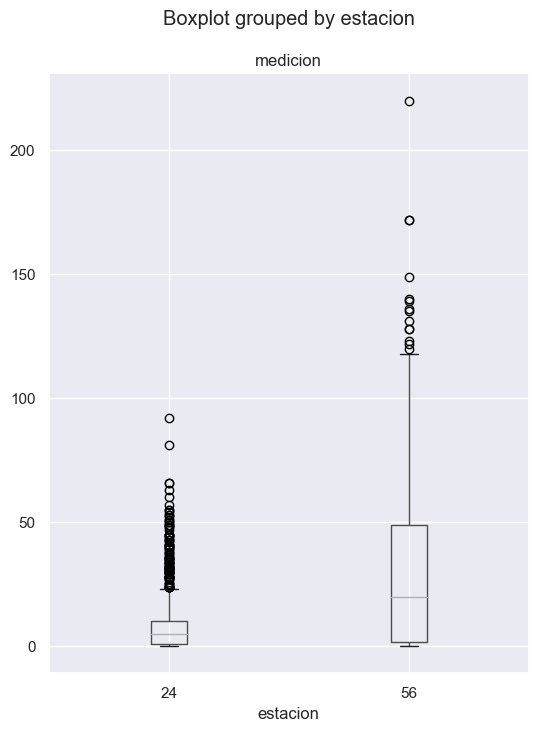

In [22]:
# Queremos comparar la medicion para ambas estaciones. COmparamos factor con escalar --> boxplot
getPlot = df_filtered.boxplot(column='medicion', by = 'estacion', figsize=(6, 8))


+ **C9: Calcula un intervalo de confianza para el nivel medio de partículas de menos de 10 μm (magnitud
10) en las mediciones de la estación de Casa de Campo. Haz lo mismo para las de la Plaza Elíptica.
¿Se solapan los intervalos? ¿Qué conclusión extraes?**

In [23]:
# Casa de campo
aireMadrid_24 = aireMadrid[(aireMadrid.estacion == 24) & (aireMadrid.magnitud < 10)]

n = len(aireMadrid_24)
print("El numero de muestras de la estación Casa de campo es de:" ,n)
barX = aireMadrid_24.medicion.mean()
print("La media muestral es de: ", barX)
s = aireMadrid_24.medicion.std()
print("La varianza es de: ", s)

sl = 0.95
alpha = 1 - sl

# Muestra grande, calculamos el punto crítico con la normal
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

# Formula de los intervalos de confianza (x barra +- crit_point*var/raiz de n)
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("El intervalo de confianza para la estacion de casa de campo es ", conf_int)
print("Redondeamos a 4 digitos: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

El numero de muestras de la estación Casa de campo es de: 1054
La media muestral es de:  8.608064516129033
La varianza es de:  11.748224551224546
El intervalo de confianza para la estacion de casa de campo es  [7.89881341 9.31731563]
Redondeamos a 4 digitos: [7.899, 9.317]


In [24]:
# Plaza elíptica
aireMadrid_56 = aireMadrid[(aireMadrid.estacion == 56) & (aireMadrid.magnitud < 10)]

n = len(aireMadrid_56)
print("El numero de muestras de la estación Casa de campo es de:" ,n)
barX = aireMadrid_56.medicion.mean()
print("La media muestral es de: ", barX)
s = aireMadrid_56.medicion.std()
print("La varianza es de: ", s)

sl = 0.95
alpha = 1 - sl

# Muestra grande, calculamos el punto crítico con la normal
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

# Formula de los intervalos de confianza (x barra +- crit_point*var/raiz de n)
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("El intervalo de confianza para la estacion de casa de campo es ", conf_int)
print("Redondeamos a 4 digitos: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

El numero de muestras de la estación Casa de campo es de: 620
La media muestral es de:  31.049354838709675
La varianza es de:  34.05919606239547
El intervalo de confianza para la estacion de casa de campo es  [28.36841765 33.73029203]
Redondeamos a 4 digitos: [28.37, 33.73]


Los intervalos no se solapan, implica que en plaza elíptica hay valores mucho mayores de contaminacion

+ **C10: Haz un contraste de la hipótesis alternativa: el valor medio de las mediciones de partículas de
menos de 10 μm en la estación de Casa de Campo es menor que el de Plaza Elíptica.**

**Nota: si no sabes hacer el contraste de dos muestras mira la sesión 6 del curso.**

**Si con eso no te aclaras, alternativamente puedes hacer un contraste de una muestra: calcula la media de las observaciones de
Plaza Elíptica. Llama μ0 a ese valor y contrasta la hipótesis alternativa el valor medio de las mediciones
de partículas de menos de 10 μm en la estación de Casa de Campo es menor que μ0.**

In [25]:
# Para comparar ambas hipotesis
stats.ttest_ind(a=aireMadrid_24.medicion, b=aireMadrid_56.medicion, equal_var=False, alternative='less')

Ttest_indResult(statistic=-15.860603875102965, pvalue=5.440673384149641e-49)

In [39]:
# Ha = {mu<mu0}
# media de las observaciones en plaza elíptica
mu0 = aireMadrid[(aireMadrid.estacion == 56) & (aireMadrid.magnitud == 10)].medicion.mean()
data = aireMadrid_24.medicion

print(mu0)
# Ha = {mu < mu0}
# Tenemos los valores de los datos, asique podemos realizar una muestra con ttest de la libreria stats
Tscore, pValue = stats.ttest_1samp(data, 
                                   popmean=mu0, # valor de referencia = mu0. No se refiere a la poblacion sobre la que estás haciendo el contraste. Valor sobre el que se discute
                                   alternative="less") # mu mas grande que, buscamos ese mu. Es la forma de contraste

print("The sample size is {:3d}".format(data.size))
print("The sample mean is {:.4}".format(data.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

19.980645161290322
The sample size is 1054
The sample mean is 8.608
The T score is -31.43
And the corresponding p-value is 9.106e-154


Tiene sentido que el p valor nos salga 0, 100% de posibilidad de rechazo de la h0, ya que, como hemos calculado antes, la contaminacion en casa de campo es mucho menor que la de plza elíptica

# Apartado 4
+ **C11: Vamos a hacer un modelo de regresión lineal para las dos variables:**
    + ***x : nivel de partículas de menos de 10 μm (magnitud 10)***
    + ***y : nivel de partículas de menos de 2.5 μm (magnitud 9)***

**En esta pregunta solo usaremos datos procedentes de la estación 38 (Cuatro Caminos) porque en esa
estación se midieron los valores de ambas variables exactamente los mismo días. Para construir el
modelo es necesario en primer lugar identificar las mediciones de esas dos variables correspondientes a
un mismo día (aparecen las dos mediciones en la misma columna). Puedes hacer esto de dos maneras.
La mejor es usar una función del tidyR. Si haces esto asegúrate de ajustar los nombres de las variables
de la tabla para que sean sintácticamente correctos (los números no sirven como nombres). La función
names permite examinar pero también modificar los nombres de una tabla.**

**Alternativamente, puedes aprovecharte del hecho de que los días de medición son los mismos y aparecen
en el mismo orden. Gracias a eso puedes: (i) dividir la tabla en dos (una conn los valores de x y otra
con los de y), (ii) extraer los valores de y de una de esas dos tablas y (iii) añadirlos a la otra.
Sea cual sea el método que uses, construye el modelo y dibuja el diagrama de dispersión de esas variables
junto con la recta de regresión obtenida.**

In [27]:
aireMadrid_38 = aireMadrid[aireMadrid.estacion == 38]
aireMadrid_38[(aireMadrid_38.dia == 1) & (aireMadrid_38.mes == 1)]

,estacion,magnitud,mes,dia,medicion,lluvia_mm,medicion_binned,lluvia
13578,38,1,1,1,20.0,0.0,"(19.0, 20.0]",0
13733,38,7,1,1,93.0,0.0,NaN,0
13888,38,8,1,1,88.0,0.0,NaN,0
14043,38,9,1,1,27.0,0.0,NaN,0
14198,38,10,1,1,37.0,0.0,NaN,0
14353,38,12,1,1,231.0,0.0,NaN,0
14508,38,20,1,1,4.2,0.0,NaN,0
14632,38,30,1,1,1.5,0.0,NaN,0
14756,38,35,1,1,0.8,0.0,NaN,0


In [34]:
# Dividimos la tabla en las dos mediciones
aireMadrid_38_X = aireMadrid_38[aireMadrid_38.magnitud == 10]
aireMadrid_38_X

,estacion,magnitud,mes,dia,medicion,lluvia_mm,medicion_binned,lluvia
14198,38,10,1,1,37.0,0.0,NaN,0
14199,38,10,1,2,36.0,0.0,NaN,0
14200,38,10,1,3,24.0,0.0,NaN,0
14201,38,10,1,4,34.0,0.0,NaN,0
14202,38,10,1,5,36.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...
14348,38,10,12,27,17.0,0.0,NaN,0
14349,38,10,12,28,28.0,0.0,NaN,0
14350,38,10,12,29,19.0,0.0,NaN,0
14351,38,10,12,30,29.0,0.0,NaN,0


In [36]:
aireMadrid_38_Y = aireMadrid_38[aireMadrid_38.magnitud == 9]
aireMadrid_38_Y

,estacion,magnitud,mes,dia,medicion,lluvia_mm,medicion_binned,lluvia
14043,38,9,1,1,27.0,0.0,NaN,0
14044,38,9,1,2,23.0,0.0,NaN,0
14045,38,9,1,3,12.0,0.0,NaN,0
14046,38,9,1,4,20.0,0.0,NaN,0
14047,38,9,1,5,23.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...
14193,38,9,12,27,13.0,0.0,NaN,0
14194,38,9,12,28,21.0,0.0,NaN,0
14195,38,9,12,29,16.0,0.0,NaN,0
14196,38,9,12,30,22.0,0.0,NaN,0


In [48]:
# Hacemos una copia en un nuevo df de la primera y añadimos una nueva columna con las mediciones de y
data = aireMadrid_38_X.copy()
data["medicion_y"] = aireMadrid_38_Y['medicion'].values


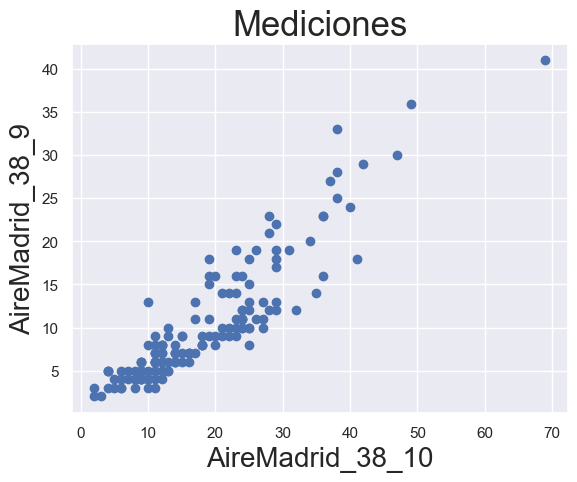

In [54]:
X = data.medicion # para añadir una constante en la matriz para que a la hora de multiplicar no se modifique.
Y = data.medicion_y.values

# Hacemos un scatterplot
plt.plot(X,Y, 'bo', data=data)
plt.xlabel('AireMadrid_38_10', fontdict={'fontsize':20})   
plt.ylabel('AireMadrid_38_9', fontdict={'fontsize':20})
plt.title('Mediciones', fontdict={'fontsize':25})
plt.show()


In [61]:
# Una vez formateada la tabla, construimos el modelo
# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model_air = sm.OLS(Y, X)# OLS comes from Ordinary Least Squares, minimizamos las medias (areas de los cuadrados)
air_fit = model_air.fit()
air_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              2509.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):                    3.18e-97
Time:                        13:10:19   Log-Likelihood:                         -389.90
No. Observations:                 155   AIC:                                      781.8
Df Residuals:                     154   BIC:                                      784.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
medicion       0.5730      0.011     50.092      0.000       0.550       0.596
==============================================================================
Omnibus:                       16.906   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.918
Skew:                           0.724   Prob(JB):                     4.73e-05
Kurtosis:                       3.994   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[2.         2.67676768 3.35353535 4.03030303 4.70707071]


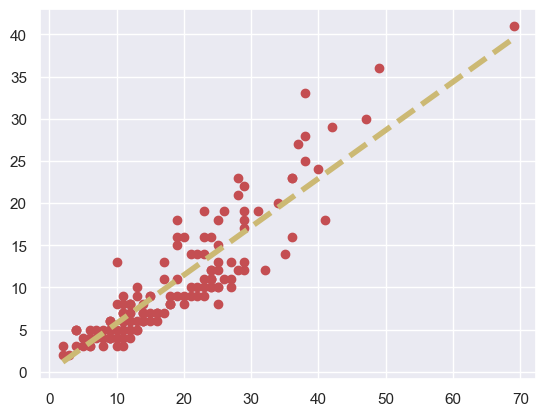

In [62]:
# Dibujamos el diagrama de dispersión
# The linspace funtion generates the grid
# linespace es como un rango, le das el minimo y el máximo y el numero de trozos en los que quieres dividir.
X_new = np.linspace(X.min(), X.max(), num = 100) # pinta los puntos rojos.
print(X_new[:5])
# Predict the corresponding Y-values
Y_new = air_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro') # pinta la muestra
# And the regression line = "predicted points"
plt.plot(X_new, Y_new, "y--", lw = 4)
plt.show()

+ **C12: ¿Qué porcentaje de la variabilidad en el nivel de partículas de menos de 2.5 μm se explica con el
modelo? Examina además los gráficos diagnósticos del modelo y úsalos para hacer un juicio sobre si ese
modelo cumple las hipótesis del modelo lineal.**

In [63]:
#Porcentaje de variabilidadpara
air_fit.rsquared

0.9421754456680165

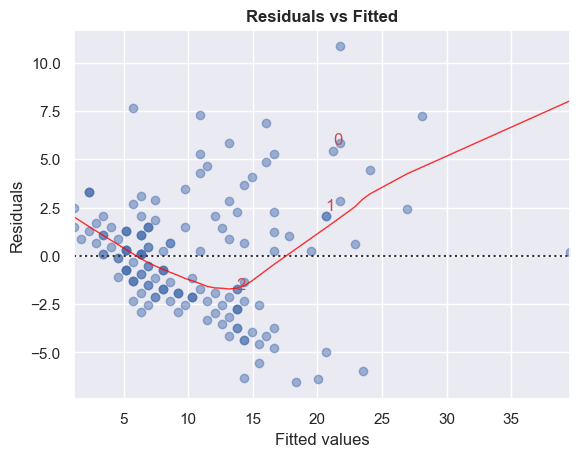

In [70]:
# Podemos pintar los valores residuales
%run ./code/Linear_Reg_Diagnostic.py # librería del curso
fit_diagnose = Linear_Reg_Diagnostic(air_fit)
fit_diagnose.residual_plot()
plt.show()